In [115]:
import jax
import jax.numpy as jnp
from jax import jacfwd, jacrev
from jax import grad

import math
from math import factorial
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [87]:
def ellipse(x, y):
  d = 1.0 - (x / 5.0)**2 - (y / 3.0)**2
  return d

def thin_ellipse(x, y):
  d = 1.0 - (x / 16.9)**2 - (y / 0.5)**2
  return d

In [88]:
# Create a 2D grid as a torch tensor
def jax_grid(xmin, xmax, ymin, ymax, resx=64, resy=64):
  dx = xmax - xmin
  dy = ymax - ymin

  ed = 0.1*math.sqrt(dx*dx+dy*dy)

  x = jnp.arange(xmin-ed, xmax+ed, step=(dx+2*ed)/float(resx))
  y = jnp.arange(ymin-ed, ymax+ed, step=(dy+2*ed)/float(resy))

  xx, yy = jnp.meshgrid(x, y)

  return xx, yy

In [89]:
# Sample function f() on torch 2D grid x,y
def jax_sampling(f, x, y):
  #nx = x.shape[0]
  #ny = x.shape[1]
  #d = nx * ny
  #xy = jnp.stack((x, y), axis=-1).reshape(d, 2)  
  #z = f(xy)
  #z = jnp.reshape(z, (nx,ny))
  z = f(x, y)
  return z

In [90]:
def show_contour_plot(x, y, f): 
  xx = x
  yy = y
  ff = f
  plt.figure(figsize=(8,4))
  h = plt.contourf(xx, yy, ff)
  h.ax.axis('equal')
  plt.title('Filled Contour Plot')
  plt.show()

def show_contour_lines(x, y, f):
  xx = x
  yy = y
  ff = f
  plt.figure()
  levels = np.arange(-0.5, 0.1, 0.1)
  CS = plt.contour(xx, yy, ff, levels)
  CB = plt.colorbar(CS, shrink=0.8, extend='both')
  plt.title('Ellipse')
  plt.axis('equal')
  plt.show()

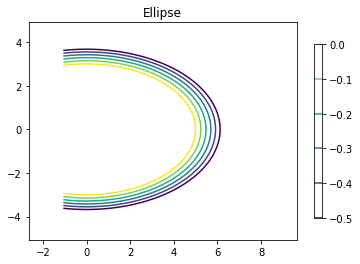

In [91]:
NX = 64
NY = 64
XMIN = 0.0
XMAX = 7.0
YMIN = -4.0
YMAX = 4.0

x,y = jax_grid(XMIN,XMAX,YMIN,YMAX,NX,NY)
f = jax_sampling(ellipse, x, y)
show_contour_lines(x, y, f)

In [128]:
def normalize(f, n):
  dfdx = grad(f, argnums=0)
  dfdy = grad(f, argnums=1)
  nx = lambda x, y : dfdx(x,y) / jnp.sqrt(dfdx(x,y)**2 + dfdy(x,y)**2)
  ny = lambda x, y : dfdy(x,y) / jnp.sqrt(dfdx(x,y)**2 + dfdy(x,y)**2)
  w1 = lambda x, y : f(x,y) / jnp.sqrt(f(x,y)**2 + dfdx(x,y)**2 + dfdy(x,y)**2)
  return normalize_(w1, nx, ny, n)

def normalize_(w1, nx, ny, n):
  if n == 1:
    return w1
  else:
    temp = normalize_(w1, nx, ny, n-1)
    dir_deriv = directional_derivative(temp, nx, ny, n)
    wk = lambda x, y : temp(x, y) - 1.0/factorial(n) * w1(x, y)**n * dir_deriv(x, y)
    return wk

def directional_derivative(f, nx, ny, n):
  if n==1:
    dfdx = grad(f, argnums=0)
    dfdy = grad(f, argnums=1)
    dir_deriv = lambda x, y : dfdx(x,y)*nx(x,y) + dfdy(x,y)*ny(x,y)
    return dir_deriv
  else:
    dir_deriv = directional_derivative(f, nx, ny, n-1)
    dddx = grad(dir_deriv, argnums=0)
    dddy = grad(dir_deriv, argnums=1)
    deriv = lambda x, y : dddx(x,y)*nx(x,y) + dddy(x,y)*ny(x,y)
    return deriv

In [129]:
w2 = normalize(ellipse, 2)

In [130]:
print(ellipse(1.0,1.0))
print(w2(1.0,1.0))

0.8488888888888888
1.0274479


In [108]:
x = jnp.array([1.0,2.0,3.0,4.0])
y = jnp.array([1.0,2.0,3.0,4.0])

In [120]:
dfdx = grad(ellipse, argnums=0)

In [131]:
jnp.vectorize(w2)(x,y)

DeviceArray([[ 1.0274479 ],
             [ 0.82896423],
             [-0.53213924],
             [-0.8740401 ]], dtype=float32)

While I have no explosion of the RAM consumption anymore for k=3, the execution time is extremely slow. 

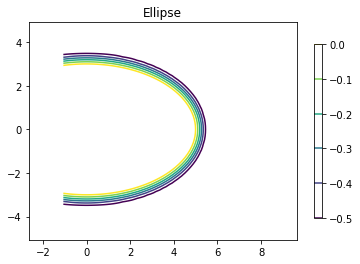

In [133]:
NX = 64
NY = 64
XMIN = 0.0
XMAX = 7.0
YMIN = -4.0
YMAX = 4.0

w3 = normalize(ellipse, 3)

x,y = jax_grid(XMIN,XMAX,YMIN,YMAX,NX,NY)
f = jax_sampling(jnp.vectorize(w3), x, y)
show_contour_lines(x, y, f)

The following code takes forever. I don't understand why currently. 

In [ ]:
w4 = normalize(ellipse, 4)
#x = jnp.array([1.0,2.0,3.0,4.0])
#y = jnp.array([1.0,2.0,3.0,4.0])
#jnp.vectorize(w4)(x,y)
w4(1.0,1.0)